# TASK 1

In [162]:
import pandas as pd
import Levenshtein
from jarowinkler import jaro_similarity
import matplotlib.pyplot as plt
import csv
import numpy as np
import re
import time
import py_stringmatching as s
from py_stringmatching import similarity_measure as sm
from itertools import combinations

In [160]:
from google.colab import files
uploaded = files.upload()

Saving ACM.csv to ACM (1).csv
Saving DBLP2.csv to DBLP2 (1).csv
Saving DBLP-ACM_perfectMapping.csv to DBLP-ACM_perfectMapping (1).csv
Saving dft-road-casualty-statistics-vehicle-2022.csv to dft-road-casualty-statistics-vehicle-2022 (1).csv
Saving diabetes.csv to diabetes.csv


In [190]:
df = pd.read_csv('dft-road-casualty-statistics-vehicle-2022.csv')

<ipython-input-190-91f070329fe9>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dft-road-casualty-statistics-vehicle-2022.csv')


In [191]:
# 1 total rows
total_rows = df.shape[0]
print(total_rows)

193545


In [192]:
# 2 Count of Null Values
null_values = df.isnull().sum()
print(null_values)

accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
vehicle_type                             0
towing_and_articulation                  0
vehicle_manoeuvre                        0
vehicle_direction_from                   0
vehicle_direction_to                     0
vehicle_location_restricted_lane         0
junction_location                        0
skidding_and_overturning                 0
hit_object_in_carriageway                0
vehicle_leaving_carriageway              0
hit_object_off_carriageway               0
first_point_of_impact                    0
vehicle_left_hand_drive                  0
journey_purpose_of_driver                0
sex_of_driver                            0
age_of_driver                            0
age_band_of_driver                       0
engine_capacity_cc                       0
propulsion_code                          0
age_of_vehi

In [193]:
# 3 Distinct Values for categorical columns
distinct_values = df.nunique()
print(distinct_values)

accident_index                      106004
accident_year                            1
accident_reference                  106004
vehicle_reference                       24
vehicle_type                            22
towing_and_articulation                  8
vehicle_manoeuvre                       20
vehicle_direction_from                  11
vehicle_direction_to                    11
vehicle_location_restricted_lane        12
junction_location                       11
skidding_and_overturning                 8
hit_object_in_carriageway               14
vehicle_leaving_carriageway             11
hit_object_off_carriageway              14
first_point_of_impact                    7
vehicle_left_hand_drive                  3
journey_purpose_of_driver                6
sex_of_driver                            3
age_of_driver                           99
age_band_of_driver                      12
engine_capacity_cc                    1015
propulsion_code                         10
age_of_vehi

In [194]:
#4  Data Types
data_types = df.dtypes
print(data_types)

accident_index                       object
accident_year                         int64
accident_reference                   object
vehicle_reference                     int64
vehicle_type                          int64
towing_and_articulation               int64
vehicle_manoeuvre                     int64
vehicle_direction_from                int64
vehicle_direction_to                  int64
vehicle_location_restricted_lane      int64
junction_location                     int64
skidding_and_overturning              int64
hit_object_in_carriageway             int64
vehicle_leaving_carriageway           int64
hit_object_off_carriageway            int64
first_point_of_impact                 int64
vehicle_left_hand_drive               int64
journey_purpose_of_driver             int64
sex_of_driver                         int64
age_of_driver                         int64
age_band_of_driver                    int64
engine_capacity_cc                    int64
propulsion_code                 

In [195]:
# 5 Value Lengths (for string columns)
value_lengths = df.select_dtypes(include=['object']).apply(lambda x: x.str.len().agg(['min', 'max', 'mean']))
print(value_lengths)



      accident_index  accident_reference  generic_make_model  lsoa_of_driver
min             13.0                 9.0            2.000000        2.000000
max             13.0                 9.0           30.000000        9.000000
mean            13.0                 9.0           10.230639        7.336991


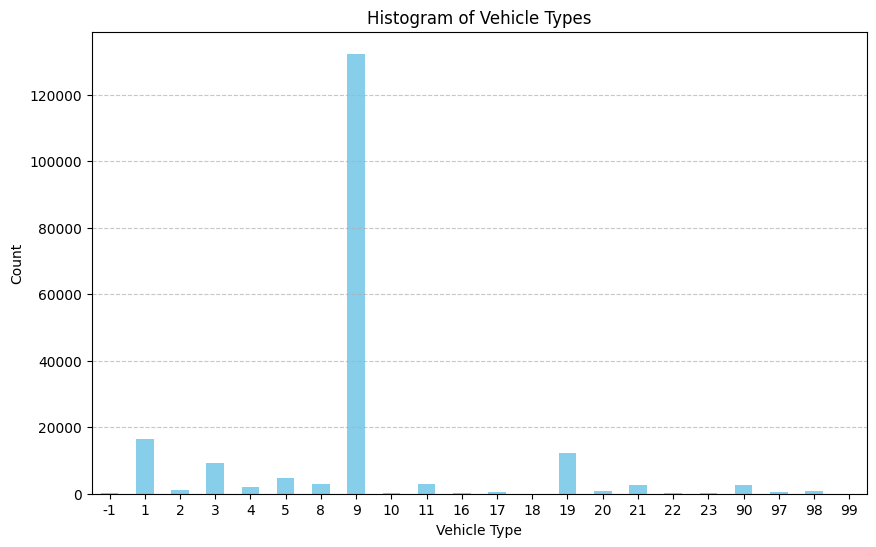

In [196]:
# 6 histogram

# Generate a histogram for the 'vehicle_type' column
plt.figure(figsize=(10, 6))
df['vehicle_type'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [197]:
# 7 Correlations  (for numeric columns)
df1 = df.select_dtypes(include=[np.number])  # Keep only numeric columns

correlations = df1.corr()
print(correlations)

                                  accident_year  vehicle_reference  \
accident_year                               NaN                NaN   
vehicle_reference                           NaN           1.000000   
vehicle_type                                NaN          -0.001973   
towing_and_articulation                     NaN          -0.010378   
vehicle_manoeuvre                           NaN          -0.015660   
vehicle_direction_from                      NaN          -0.022725   
vehicle_direction_to                        NaN          -0.024650   
vehicle_location_restricted_lane            NaN          -0.008757   
junction_location                           NaN          -0.010714   
skidding_and_overturning                    NaN          -0.014152   
hit_object_in_carriageway                   NaN          -0.010002   
vehicle_leaving_carriageway                 NaN          -0.020151   
hit_object_off_carriageway                  NaN          -0.010668   
first_point_of_impac

In [198]:
# 8. Most Frequent Value
most_frequent_values = df.mode().iloc[0]
print(most_frequent_values)

accident_index                      2022371220504
accident_year                              2022.0
accident_reference                      371220504
vehicle_reference                             1.0
vehicle_type                                  9.0
towing_and_articulation                       0.0
vehicle_manoeuvre                            18.0
vehicle_direction_from                        1.0
vehicle_direction_to                          1.0
vehicle_location_restricted_lane              0.0
junction_location                             0.0
skidding_and_overturning                      0.0
hit_object_in_carriageway                     0.0
vehicle_leaving_carriageway                   0.0
hit_object_off_carriageway                    0.0
first_point_of_impact                         1.0
vehicle_left_hand_drive                       1.0
journey_purpose_of_driver                     6.0
sex_of_driver                                 1.0
age_of_driver                                -1.0


In [199]:
# 9. Common Patterns (most frequent make/model)
common_patterns = df['generic_make_model'].value_counts().head(5)
print(common_patterns)

generic_make_model
-1                 47009
FORD FIESTA         5628
VAUXHALL CORSA      4518
VOLKSWAGEN GOLF     4213
FORD FOCUS          3774
Name: count, dtype: int64


In [26]:
# 10 quartiles


# Get descriptive statistics including quartiles for numeric columns
quartiles = df.describe()

# Display the quartiles
print(quartiles.loc[['25%', '50%', '75%']])


     accident_year  vehicle_reference  vehicle_type  towing_and_articulation  \
25%         2022.0                1.0           9.0                      0.0   
50%         2022.0                1.0           9.0                      0.0   
75%         2022.0                2.0           9.0                      0.0   

     vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
25%                8.0                     2.0                   2.0   
50%               18.0                     5.0                   5.0   
75%               18.0                     7.0                   7.0   

     vehicle_location_restricted_lane  junction_location  \
25%                               0.0                0.0   
50%                               0.0                1.0   
75%                               0.0                6.0   

     skidding_and_overturning  ...  propulsion_code  age_of_vehicle  \
25%                       0.0  ...              1.0             1.0   
50%    

In [27]:
# 11 most common gender in accidents

# Create a mapping for the sex_of_driver values
sex_mapping = {1: 'Male', 2: 'Female', 3: 'Unknown_Unspecified'}

# Apply the mapping to the 'sex_of_driver' column
df3 = df.copy()
df3['sex_of_driver'] = df3['sex_of_driver'].replace(sex_mapping)


# Display the updated column
print(df3['sex_of_driver'].mode())

0    Male
Name: sex_of_driver, dtype: object


In [183]:
# 12 standard deviation for each numerical column in the DataFrame

std_deviation = df1.std()
print(std_deviation)

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                12.106044
SkinThickness                 8.923908
Insulin                     115.244002
BMI                           6.878970
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


# TASK 2

In [98]:
df_acm = pd.read_csv('ACM.csv',encoding='ISO-8859-1')


In [99]:
df_dblp2 = pd.read_csv('DBLP2.csv',encoding='ISO-8859-1')

In [100]:
df_mapping = pd.read_csv('DBLP-ACM_perfectMapping.csv',encoding='ISO-8859-1')

### a,b,c,d

In [101]:
# drop id
df_acm = df_acm.drop('id', axis = 1)
df_dblp2 = df_dblp2.drop('id', axis = 1)

#Change all alphabetical characters into lowercase.
df_acm = df_acm.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_dblp2 = df_dblp2.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#Convert multiple spaces to one
df_acm = df_acm.applymap(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)
df_dblp2 = df_dblp2.applymap(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)



# Get the titles from both datasets
acm_titles = df_acm['title'].tolist()
dblp_titles = df_dblp2['title'].tolist()


# Calculating the similarity scores for each pair of titles.
similarity_scores = []

for acm_title in acm_titles:
    for dblp_title in dblp_titles:
        # Calculate Levenshtein distance
        edit_distance = Levenshtein.distance(acm_title, dblp_title)
        # Calculate similarity score
        max_len = max(len(acm_title), len(dblp_title))
        similarity_score = 1 - (edit_distance / max_len)

        similarity_scores.append({
            'acm_title': acm_title,
            'dblp_title': dblp_title,
            'similarity_score': similarity_score
        })

# Convert the results to a DataFrame and print them
similarity_titles = pd.DataFrame(similarity_scores)

print(similarity_titles)





<ipython-input-101-cd1342e16287>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_acm = df_acm.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-101-cd1342e16287>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dblp2 = df_dblp2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-101-cd1342e16287>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_acm = df_acm.applymap(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)
<ipython-input-101-cd1342e16287>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dblp2 = df_dblp2.applymap(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)


                                                 acm_title  \
0        the wasa2 object-oriented workflow management ...   
1        the wasa2 object-oriented workflow management ...   
2        the wasa2 object-oriented workflow management ...   
3        the wasa2 object-oriented workflow management ...   
4        the wasa2 object-oriented workflow management ...   
...                                                    ...   
6001099     bulk loading into an oodb: a performance study   
6001100     bulk loading into an oodb: a performance study   
6001101     bulk loading into an oodb: a performance study   
6001102     bulk loading into an oodb: a performance study   
6001103     bulk loading into an oodb: a performance study   

                                                dblp_title  similarity_score  
0        semantic integration of environmental models f...          0.245455  
1        estimation of query-result distribution and it...          0.197802  
2        increment

### e

In [102]:
# jaro similarity

acm_authors = df_acm['authors'].tolist()
dblp_authors = df_dblp2['authors'].tolist()

similarity_scores_authors = []

for acm_author in acm_authors:
    for dblp_author in dblp_authors:
        # Calculate Jaro similarity
        similarity_score = jaro_similarity(acm_author, dblp_author)

        similarity_scores_authors.append({
            'acm_author': acm_author,
            'dblp_author': dblp_author,
            'similarity_score': similarity_score
        })

# Convert the results to a DataFrame and print them
similarity_authors = pd.DataFrame(similarity_scores_authors)
print(similarity_authors)

                                   acm_author  \
0             gottfried vossen, mathias weske   
1             gottfried vossen, mathias weske   
2             gottfried vossen, mathias weske   
3             gottfried vossen, mathias weske   
4             gottfried vossen, mathias weske   
...                                       ...   
6001099  janet l. wiener, jeffrey f. naughton   
6001100  janet l. wiener, jeffrey f. naughton   
6001101  janet l. wiener, jeffrey f. naughton   
6001102  janet l. wiener, jeffrey f. naughton   
6001103  janet l. wiener, jeffrey f. naughton   

                                               dblp_author  similarity_score  
0                                          d. scott mackay          0.563082  
1                   viswanath poosala, yannis e. ioannidis          0.563950  
2        themistoklis palpanas, richard sidle, hamid pi...          0.574531  
3        zhao-hui tang, georges gardarin, jean-robert g...          0.571552  
4               

### f

In [137]:
from py_stringmatching import similarity_measure as sm

# Extract the venue lists
acm_venues = df_acm['venue'].tolist()
dblp_venues = df_dblp2['venue'].tolist()

# Initialize a list to store the similarity scores
similarity_scores_venues = []

# Define the affine similarity function
def aff_sim(s1, s2, open_gap=1, gap_ext=0.1):
    aff_sim = sm.affine.Affine(gap_start=open_gap, gap_continuation=gap_ext,
                        sim_func=lambda s1, s2: (1 if s1 == s2 else 0))  # 1 for match, 0 for mismatch
    raw_score = aff_sim.get_raw_score(s1, s2)

    # Normalize the similarity score to the range [0, 1] based on the longer string
    max_len = max(len(s1), len(s2))

    # Clamp any negative values to 0 to ensure non-negative similarity scores
    normalized_score = max(0, raw_score / max_len if max_len > 0 else 0)

    return normalized_score

# Compare every ACM venue with every DBLP venue
for acm_venue in acm_venues:
    for dblp_venue in dblp_venues:
        # Calculate the similarity score for the current pair of venues
        similarity_score = aff_sim(acm_venue, dblp_venue)

        # Append the result to the list
        similarity_scores_venues.append({
            'acm_venue': acm_venue,
            'dblp_venue': dblp_venue,
            'similarity_score': similarity_score
        })

# Convert the results to a DataFrame and print them
similarity_venues = pd.DataFrame(similarity_scores_venues)
print(similarity_venues)


                                              acm_venue  \
0        international conference on management of data   
1        international conference on management of data   
2        international conference on management of data   
3        international conference on management of data   
4        international conference on management of data   
...                                                 ...   
6001099                           very large data bases   
6001100                           very large data bases   
6001101                           very large data bases   
6001102                           very large data bases   
6001103                           very large data bases   

                        dblp_venue  similarity_score  
0                    sigmod record             0.000  
1                             vldb             0.000  
2                             vldb             0.000  
3                             vldb             0.000  
4               

### g

In [163]:
year_similarity_results = []

acm_years = df_acm['year']
dblp_years = df_dblp2['year']


for acm_year in acm_years:
    for dblp_year in dblp_years:

        match_score = 1 if acm_year == dblp_year else 0
        year_similarity_results.append((acm_year, dblp_year, match_score))

year_similarity_df = pd.DataFrame(year_similarity_results, columns=['ACM Year', 'DBLP Year', 'Match (1) / Mismatch (0)'])

print(year_similarity_df)

         ACM Year  DBLP Year  Match (1) / Mismatch (0)
0            1999       1999                         1
1            1999       1996                         0
2            1999       2002                         0
3            1999       1996                         0
4            1999       1995                         0
...           ...        ...                       ...
6001099      1994       2003                         0
6001100      1994       2003                         0
6001101      1994       2002                         0
6001102      1994       2001                         0
6001103      1994       2001                         0

[6001104 rows x 3 columns]


### h

In [169]:
# Keeping Id Columns from ACM, DBLP tables
acm_ids = new_df_acm['id']
dblp_ids = new_df_dblp2['id']

weights = [0.4, 0.3, 0.2, 0.1]  # weights for title, author, venue, year, total is 1


s_t = similarity_titles['similarity_score']  # Title similarity based on Levenshtein distance
s_a = similarity_authors['similarity_score']  # Author similarity based on Jaro distance
s_c = similarity_venues['similarity_score']  # Venue similarity based on scaled affine
s_y = year_similarity_df['Match (1) / Mismatch (0)']  # Year similarity as match/mismatch

rec_sim = (weights[0] * s_t +
           weights[1] * s_a +
           weights[2] * s_c +
           weights[3] * s_y)

final_similarity_df = pd.DataFrame({
    'ID ACM': acm_ids,
    'ID DBLP': dblp_ids,
    'Title Similarity': s_t,
    'Author Similarity': s_a,
    'Venue Similarity': s_c,
    'Year Similarity': s_y,
    'Final Similarity Score': rec_sim
})

print("\nFinal Similarity DataFrame:")
print(final_similarity_df)



Final Similarity DataFrame:
           ID ACM                   ID DBLP  Title Similarity  \
0        304586.0  journals/sigmod/Mackay99          0.245455   
1        304587.0      conf/vldb/PoosalaI96          0.197802   
2        304589.0   conf/vldb/PalpanasSCP02          0.218750   
3        304590.0    conf/vldb/GardarinGT96          0.233333   
4        304582.0         conf/vldb/HoelS95          0.107143   
...           ...                       ...               ...   
6001099       NaN                       NaN          0.220588   
6001100       NaN                       NaN          0.242857   
6001101       NaN                       NaN          0.231707   
6001102       NaN                       NaN          0.130435   
6001103       NaN                       NaN          0.220339   

         Author Similarity  Venue Similarity  Year Similarity  \
0                 0.563082             0.000                1   
1                 0.563950             0.000                

In [170]:
# Filter records with Final Similarity Score greater than 0.7
duplicate_records = final_similarity_df[final_similarity_df['Final Similarity Score'] > 0.7]

# Store the indices of the duplicate records
duplicate_ids = duplicate_records.index.tolist()

print("Duplicate Records (rec_sim > 0.7):")
print(duplicate_records[['Final Similarity Score']])  # Displaying the Final Similarity Score
print("\nList of Duplicate IDs (using index):", duplicate_ids)  # Show the indices as IDs


Duplicate Records (rec_sim > 0.7):
         Final Similarity Score
2123                   0.728004
4086                   0.743254
5672                   0.745718
8311                   0.766210
11437                  0.793906
...                         ...
5988034                0.800000
5991311                0.727415
5994804                0.769737
5996526                0.935050
6001095                0.737879

[2301 rows x 1 columns]

List of Duplicate IDs (using index): [2123, 4086, 5672, 8311, 11437, 14226, 17394, 19983, 21105, 26029, 27404, 30034, 32067, 34615, 38710, 39862, 43523, 45697, 47118, 51721, 52934, 56631, 58789, 60641, 63107, 66584, 70038, 71660, 75696, 76988, 80992, 83012, 85536, 86908, 89071, 92177, 94766, 97838, 100339, 102089, 111149, 113546, 115832, 118779, 122049, 123870, 128056, 128189, 132543, 133943, 136894, 139447, 143155, 144957, 147676, 149866, 153142, 156647, 158751, 161641, 163124, 167152, 168244, 171149, 174397, 177531, 178682, 182106, 184404, 186528,

### j,k

# Task 2 part 2

### 1,2,3,4

In [171]:
acm = pd.read_csv("./ACM.csv")
dblp2 = pd.read_csv("./DBLP2.csv", encoding = 'latin-1')
mapping = pd.read_csv("./DBLP-ACM_perfectMapping.csv")

# drop id column from both dataframes, as it is irrelvant for record similarity

acm_v1 = acm.drop('id', axis = 1)
dblp2_v1 = dblp2.drop('id', axis = 1)


## 1 Concatenate the values in each record into one single string.


conc_acm = acm_v1.apply(lambda row: ' '.join(map(str, row.values)), axis=1)
conc_dblp2 = dblp2_v1.apply(lambda row: ' '.join(map(str, row.values)), axis=1)


# 2 Change all alphabetical characters into lowercase.


# acm lowercase
conc_lower_acm = conc_acm.str.lower()

# dblp lowercase
conc_lower_dblp2 = conc_dblp2.str.lower()


# 3 Convert multiple spaces to one.

# Convertion to one space in df_acm
acm_con = conc_lower_acm.str.replace('  ', ' ')

# Convertion to one space in df_dblp
dblp2_con = conc_lower_dblp2.str.replace('  ', ' ')


# 4 Combine the records from both tables.


acm_list = acm_con.values.tolist()
dblp2_list = dblp2_con.values.tolist()

acm_dblp2 = acm_list + dblp2_list

### 5

In [172]:



def shingle(text: str, k: int)->set:
    shingle_set = []
    for i in range(len(text) - k+1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)


def build_vocab(shingle_sets: list)->dict:
    full_set = {item for set_ in shingle_sets for item in set_}
    vocab = {}
    for i, shingles in enumerate(list(full_set)):
        vocab[shingles] = i
    return vocab


def one_hot(shingles: set, vocab: dict):
    vec = np.zeros(len(vocab))
    for s in shingles:
        idx = vocab[s]
        vec[idx] = 1
    return vec

k = 3
shingles = []
for char in acm_dblp2:
    shingles.append(shingle(char,k))

vocab = build_vocab(shingles)


shingles_1hot = []
for shingle_set in shingles:
    shingles_1hot.append(one_hot(shingle_set,vocab))
shingles_1hot = np.stack(shingles_1hot)



def get_minhash_arr(num_hashes:int,vocab:dict):
    length = len(vocab.keys())
    arr = np.zeros((num_hashes,length))
    for i in range(num_hashes):
        permutation = np.random.permutation(len(vocab.keys())) + 1
        arr[i,:] = permutation.copy()
    return arr.astype(int)


def get_signature(minhash:np.ndarray, vector:np.ndarray):
    idx = np.nonzero(vector)[0].tolist()
    shingles = minhash[:,idx]
    signature = np.min(shingles,axis=1)
    return signature


minHash_arr = get_minhash_arr(100,vocab)
signature_matrix = [get_signature(minHash_arr, vec) for vec in shingles_1hot]



def jaccard_similarity(set1, set2):
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    return intersection_size / union_size if union_size != 0 else 0.0

def compute_signature_similarity(signature_1, signature_2):
    # Ensure the matrices have the same shape
    if signature_1.shape != signature_2.shape:
        raise ValueError("Both signature matrices must have the same shape.")
    # Count the number of rows where the two matrices agree
    agreement_count = np.sum(signature_1 == signature_2)
    # Calculate the similarity
    similarity = agreement_count / signature_2.shape[0]

    return similarity



print(compute_signature_similarity(signature_matrix[2],signature_matrix[3]))
print(jaccard_similarity(shingles[3],shingles[2]))







0.25
0.20388349514563106


### 6,7

In [173]:
start_time = time.time()
class LSH:

    def __init__(self, b: int):
        self.b = b
        self.buckets = [] # instance variablie so inititialized with every new instance
        self.counter = 0  # instance variablie so inititialized with every new instance
        for i in range(b):
            self.buckets.append({})


    def make_subvecs(self, signature: np.ndarray) -> np.ndarray:
        l = len(signature)
        assert l % self.b == 0
        r = int(l / self.b)
        subvecs = []
        for i in range(0, l, r):
            subvecs.append(signature[i:i+r])
        return np.stack(subvecs)


    def add_hash(self, signature: np.ndarray):
        subvecs = self.make_subvecs(signature).astype(str)
        for i, subvec in enumerate(subvecs):
            subvec = ','.join(subvec)
            if subvec not in self.buckets[i].keys():
                self.buckets[i][subvec] = []
            self.buckets[i][subvec].append(self.counter)
        self.counter += 1


    def check_candidates(self) -> set:
        candidates = []
        for bucket_band in self.buckets:
            keys = bucket_band.keys()
            for bucket in keys:
                hits = bucket_band[bucket]
                if len(hits) > 1:
                    candidates.extend(combinations(hits, 2))
        return set(candidates)






In [174]:
b = 10   # number of buckets
lsh = LSH(b)
for signature in signature_matrix:
    lsh.add_hash(signature)
candidate_pairs = lsh.check_candidates()



for candidate in list(candidate_pairs)[:5]:
    print("Candidate similar sentence are:")
    print(acm_dblp2[candidate[0]])
    print(acm_dblp2[candidate[1]])
    print("="*10)


topLSH = []

for candidate in list(candidate_pairs):
    hit = acm_dblp2[candidate[0]]
    topLSH.append(hit)

hits =  acm[acm['id'].isin(list(mapping['idACM']))]
hits.info()
hits = hits.drop('id', axis = 1)
hits_col = hits[hits.columns]
hits_concat = hits_col.astype(str).agg(' '.join, axis=1)
hits_concat = hits_concat.str.replace('  ', ' ')
hits_concat = hits_concat.str.lower()
hits_concat = hits_concat.tolist()
hits_concat[:5]





set1 = set(hits_concat)
set2 = set(topLSH)

overlap = list(set1.intersection(set2))

precision = round(len(overlap)/len(topLSH), 3)
print(f'precision is:  {round(len(overlap)/len(topLSH), 3)}')



end_time = time.time()

elapsed_time = end_time - start_time
print(f"Running Time of the LSH Method:{elapsed_time} seconds.")

Candidate similar sentence are:
a web odyssey: from codd to xml victor vianu acm sigmod record 2003
a web odyssey: from codd to xml victor vianu sigmod record 2003
Candidate similar sentence are:
book review column karl aberer acm sigmod record 2002
book review column karl aberer sigmod record 2002
Candidate similar sentence are:
databases and visualization daniel a. keim international conference on management of data 1996
visdb: a system for visualizing large databases daniel a. keim, hans-peter kriegel international conference on management of data 1995
Candidate similar sentence are:
book review column karl aberer sigmod record 2003
book review column karl aberer sigmod record 2002
Candidate similar sentence are:
design and user testing of a multi-paradigm query interface to an object-oriented database dac khoa doan, norman w. paton, alistair kilgour acm sigmod record 1995
design and user testing of a multi-paradigm query interface to an object-oriented database dac khoa doan, alist

### 8

# Task 3

# 1

In [184]:
df_diabetes = pd.read_csv("diabetes.csv")
# Drop the outcome column
df_without_outcome = df_diabetes.drop(columns=['Outcome'])

In [185]:
# Check the correlation for each column pair
correlation_matrix_v1 = df_without_outcome.corr()
print(correlation_matrix_v1)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805    

# **2**

In [186]:

df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)


df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0,33.6,0.627,50,1
1,1,85,66.0,29.0,0,26.6,0.351,31,0
2,8,183,64.0,33.0,0,23.3,0.672,32,1
3,1,89,66.0,23.0,94,28.1,0.167,21,0
4,0,137,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180,32.9,0.171,63,0
764,2,122,70.0,27.0,0,36.8,0.340,27,0
765,5,121,72.0,23.0,112,26.2,0.245,30,0
766,1,126,60.0,33.0,0,30.1,0.349,47,1


# 3

In [189]:
cols_with_disguised_zeros = ['BloodPressure', 'SkinThickness', 'BMI']
# Fill NaN values based on the mean of the respective class (Outcome column)
for col in cols_with_disguised_zeros:
    df_diabetes[col] = df_diabetes.groupby('Outcome')[col].transform(lambda x: x.fillna(x.mean()))

# 4

In [188]:
# Compute the correlation matrix
correlation_matrix_v2 = df_diabetes.corr()

In [187]:
# Display the correlation matrix
print(correlation_matrix_v2)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.208935       0.094172   
Glucose                      0.129459  1.000000       0.222417       0.220943   
BloodPressure                0.208935  0.222417       1.000000       0.203453   
SkinThickness                0.094172  0.220943       0.203453       1.000000   
Insulin                     -0.073535  0.331357      -0.048106       0.104017   
BMI                          0.024127  0.219879       0.286518       0.565443   
DiabetesPedigreeFunction    -0.033523  0.137337      -0.002264       0.102426   
Age                          0.544341  0.263514       0.324439       0.135916   
Outcome                      0.221898  0.466581       0.175087       0.308094   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.024127                 -0.033523   
Glucose                   0.331357  0.219